# Занятие 7. Деревья принятия решений
<b><i>Деревья принятия решений (Decision Tree)</i></b> являются универсальными алгоритмами машинного обучения, которые могут заниматься задачами классификации и регрессии, включая даже многовыходовые задачи. Они представляют собой мощные алгоритмы, способные подгоняться к сложным наборам данных. 

Они также являются фундаментальными компонентами случайных лесов (на следующем занятии), которые входят в число самых мощных алгоритмов машинного обучения, доступных на сегодняшний день.

В настоящей главе мы начнём с обсуждения того, как обучать, визуализировать и вырабатывать прогнозы с помощью деревьев принятия решений. Затем мы рассмотрим алгоритмы обучения CART, используемый библиотекой Scikit-Learn, а также выясним, каким образом регуляризировать деревья и применять их для задач регрессии. Наконец, мы взглянем на некоторые ограничения деревьев принятия решений.

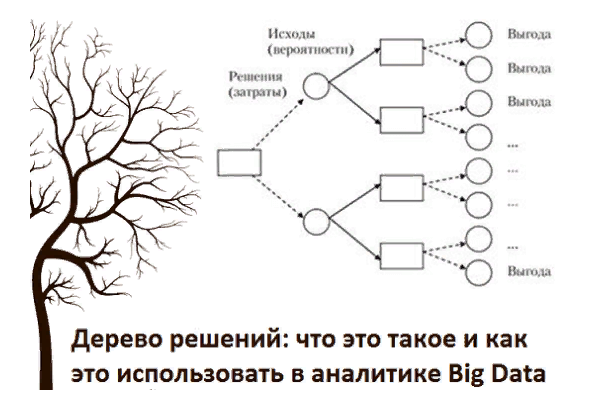

## Обучение и визуализация дерева принятия решений
Чтобы понять деревья принятия решений, нужно <s>самому стать деревом</s> построить одно такое дерево и посмотреть, как оно вырабатывает прогнозы. Следующий код обучает классификатор DecisionTreeClassifier на наборе данных iris.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2: ] # длина и ширина лепестка
y = iris.target

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

Вы можете визуализировать обученное дерево принятия решений, используя функцию plot_tree():

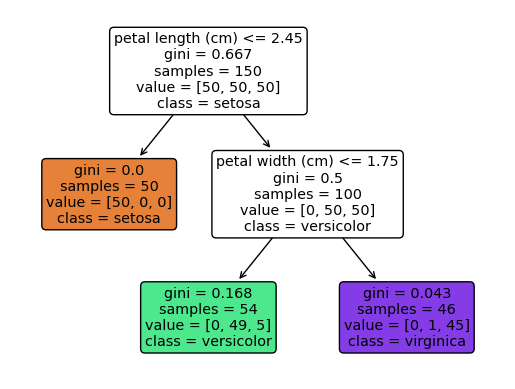

In [5]:
from sklearn.tree import plot_tree
plot_tree(tree_clf, 
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          rounded=True, filled=True); 

## Вырабатывание прогнозов
Давайте выясним, как дерево, представленное выше, вырабатывает прогнозы. Предположим, что вы нашли цветок ириса и хотите его классифицировать. Вы начинаете с <i>корневого узло</i> (глубина 0, вверху): корневой узел спрашивает, меньше ли 0.8 см длина лепестка у цветка? Если меньше, тогда вы спускаетесь к левому дочернему узлу корневого узла (глубина 1, слева). В данном случае это <i>листовой узел</i> (т.е. он не имеет дочерних узлов), а потому он не задаёт никаких вопросов: вы можете просто посмотреть на спрогнозированный класс для данного узла, и дерево принятия решения прогнозирует, что ваш цветок -- ирис щетинистый (class=setosa).

Теперь представим, что вы нашли ещё один цветок, длина лепестка которого больше 0.8 см. Вы должны спуститься к правому дочернему узлу корневого листа (глубина 1, справа), который не является листовым, так что он задаёт новый вопрос: меньше ли 1.75 см ширина лепестка у цветка? Если меньше, тогда весьма вероятно, что ваш цветок -- ирис разноцветный (глубина 2, слева), а если нет, то ирис виргинский (глубина 2, справа). Действительно, всё настолько просто.

Одно из многих качеств деревьев принятия решений заключается в том, что они требуют совсем небольшой подготовки данных. Фактически для них <b>вообще не нужно масштабировать признаки</b>.

Атрибут <b>samples</b> узла подсчитывает, к скольким обучающим образцам он применяется. Например, 100 образцов имеют ширину лепестка больше 0.8 см, и 54 образца из этих 100 имеют ширину лепестка меньше 1.75 см.

Атрибут <b>value</b> узла сообщает, к скольким обучающим образцам каждого класса применяется этот узел: например, правый нижний узел применяется к 0 образцов ириса щетинистого, к 1 образцу ириса разноцветного и 45 образцам ириса виргинского.

В заключение атрибут <b>gini</b> (показатель Джини (Gini)) узла измеряет его загрязнённость (impurity): узел "чистый" (gini=0), если все обучающие образцы, к которым он применяется, принадлежат к одному и тому же классу. Скажем, поскольку узел на глубине 1 слева применяется только к обучающим образцам ириса щетинистого, он чистый и его показатель Джини равен 0. В уравнении ниже показано, как алгоритм обучения подсчитывает показатель Джини $G_i$ для i-го узла. Узел на глубине 2 слева имеет показатель Джини, равный $1 - {(\frac{0}{54})}^2 - {(\frac{49}{54})}^2 - {(\frac{5}{54})}^2 = 0.168$.

$$G_i = 1 - \sum_{k=1}^n p_{i, k}^2$$
где $p_{i, k}$ $-$ доля образцов класса k среди обучающих образцов в i-м узле.

Библиотека Scikit-Learn использует алгоритм CART, который выпускает только <i>двоичные деревья</i>: нелистовые узлы всегда имеют два дочерних узла (т.е. для вопросов существуют ответы "да/нет"). Однако другие алгоритмы вроде ID3 могут выпускать деревья принятия решений с узлами, имеющими больше двух дочерних узлов.

На рисунке ниже изображены границы решений для этого дерева принятия решений. Толстая вертикальная линия представляет границу решений корневого узла (глубина 0): длина лепестка = 0.8 см. Поскольку левая область чистая (только ирис щетинистый), она не может быть дополнительно расщеплена. Тем не менее, правая область загрязнена и потому узел на глубине 1 справа расщепляет её при ширине лепестка 1.75 см. (представленной пунктирной линией). Так как гиперпараметр max_depth был установлен в 2, дерево принятия решений останавливается прямо здесь. Однако если вы установите max_depth в 3, тогда каждый из двух узлов на глубине 2 добавит ещё одну границу решений (представленную точечной линией).

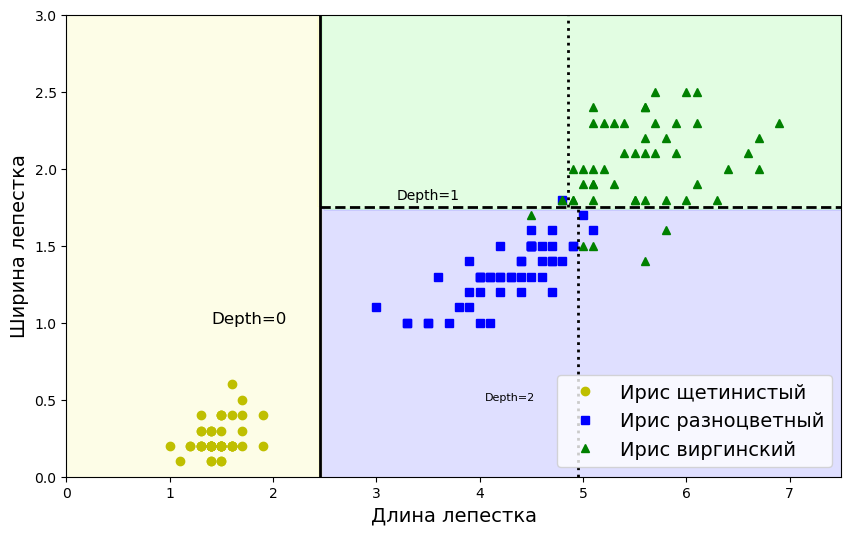

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # задать векторы, содержащие метки координатных осей графика 
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    
    # списки координатных матриц из координатных векторов
    x1, x2 = np.meshgrid(x1s, x2s)
    
    # массив из выпрямленных координатных матриц
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # получить предсказания классификатора
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # задать цветовую карту для графика
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Ирис щетинистый")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Ирис разноцветный")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Ирис виргинский")
        plt.axis(axes)
    if iris:
        plt.xlabel("Длина лепестка", fontsize=14)
        plt.ylabel("Ширина лепестка", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
plt.figure(figsize=(10, 6))
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=12)
plt.text(3.2, 1.80, "Depth=1", fontsize=10)
plt.text(4.05, 0.5, "Depth=2", fontsize=8)

plt.show();

## Интерпретация модели: белый ящик или чёрный ящик
Деревья принятия решений просты для понимания, а их решения легко интерпретировать. Такие модели часто называют <i>моделями белого ящика</i>. Как вы увидите, по контрасту с ними случайные леса или нейронные сети в большинстве случаев рассматриваются как <i>модели чёрного ящика</i>. Они вырабатывают замечательные прогнозы, и вы сможете легко проверить вычисления, которые выполняются для выдачи прогнозов; тем не менее, объяснить простыми терминами, почему были выработаны именно такие прогнозы, обычно нелегко. Например, если нейронная сеть сообщает о присутствии на фотографии конкректного человека, то трудно узнать, что на самом деле способствовало такому прогнозу: распознала ли модель глаза этого человека? Его рот? Его нос? Обувь? Или даже диван, на котором он сидел? И наоборот, деревья принятия решений предоставляют простые и аккуратные правила классификации, которые в случае необходимости можно даже применять вручную (например, для классификации цветков).

## Оценивание вероятностей классов
Дерево принятия решений также в состоянии оценивать вероятность принадлежности образца определенному классу k. Сначала происходит обход дерева, чтобы найти листовой узел для данного образца, и затем возвращается пропорция обучающих образцов класса k в найденном узле. В качестве примера предположим, что вы обнаружили цветок  с лепестками длиной 5 см и шириной 1.5 см. Соответствующий листовой узел находится на глубине 2 слева, поэтому дерево принятия решений должно выдать следующие вероятности: 0% для ириса щетинистого, 90.7% для ириса разноцветного и 9.3% для ириса виргинского. И если вы продложите спрогнозировать класс, то дерево принятия решений должно выдать ирис разноцветный, потому что он имеет самую высокую вероятность. Давайте проверим сказанное:

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

## Алгоритм обучения CART
Для обучения деревьев принятия решений (также называемых "растущими деревьями") библиотека Scikit-Learn использует алгоритм <i>дерева классификации и регрессии (Classification And Regression Tree $-$ CART)</i>. Алгоритм CART сначала расщепляет обучающий набор на два поднабора с применение единственного признака k и порога $t_k$ (скажем, "длина лепестка <= 0.8 см"). Как он выбирает k и $t_k$? Алгоритм ищет пару (k, $t_k$), которая производи самые чистые поднаборы (взвешенные по их размеру). В уравнении ниже представлена функция издержек, которуб он пытается минимизировать.

$$J(k, t_k) = \frac{m_{левый}}{m}G_{левый} + \frac{m_{правый}}{m}G_{правый}$$

После того, как алгоритм успешно расщепил обучающий набор на два поднабора, он расщепляет полученные поднаборы, используя ту же самую логику, затем расщепляет поднаборы и продолжает это делать рекурсивно. Алгоритм останавливает рекурсию, когда достигнет максимальной глубины (определённой гиперпараметром max_depth) или когда не может найти расщепление, которое сократило бы загрянённость. Дополнительные условия остановки управляются рядом других гиперпараметров, которые будут рассмотрены ниже (min_samples_split, min_samples_leaf, min_weight_fraction_leaf и max_nodes).

## Загрязнённость Джини или энтропия?
По умолчанию применяется мера загрязнённости Джини, но вместо неё вы можете выбрать меру <i>энтропии</i> загрязнённости, установив гиперпараметр criterion в "entropy". Концепция энтропии появилась в термодинамике как мера молекулярного беспорядка: энтропия приближается к нулю, когда молекулы неподвижны и вполне упорядочены. Позже энтропия распростанилась на разнообразные предметные области, включая <i>теорию информации</i> Шеннона, где она измеряет среднее количество информации сообщения: энтропия равна нулю, когда все сообщения идентичны. В машинному обучении она часто используется в качестве меры загрязнённости: энтропия набора равна нулю, когда он содержит образцы только одного класса. В уравнении ниже показано определение энтропии i-го узла дерева. Например, узел на глубине 2 слева имеет энтропию $-\frac{49}{54}log(\frac{49}{54}) - \frac{5}{54}log(\frac{5}{54}) = 0.31$

$$H_i = - \sum_{k = 1}^n p_{i, k}log(p_{i,k})$$

Итак, что вы должны применять $-$ загрязнённость Джини или энтропию? По правде говоря, большую часть времени особой разницы нет: они приводят к похожим деревьям. Загрязнённость Джини слегка быстрее подсчитывать, поэтому оня является хорошим вариантом по умолчанию. Тем не менее, когда разница есть, загрязнённость Джини имеет тенденцию изолировать самый часто встречающийся класс в собственной ветви дерева, а энтропия $-$ производить чуть более сбалансированные деревья.

## Гиперпараметры регуляризации
Деревья принятия решений выдвигают очень мало предположений об обучающих данных (в противоположность, например, линейным моделям, которые очевидным образом предполагают, что данные линейны). Если не связывать древовидную структуру ограничениями, тогда она будет адаптировать себя к обучающим данным, очень близко подгоняясь к ним $-$ на самом деле вполне допуская переобучение. Такая модель часто называется <i>непараметрической моделью</i>, но не из-за отсутствия каких-либо параметров (они имеются и нередко в изобилии), а по той причине, что количество параметров перед обучением не определено, оттого структура модели вольна тесно привязываться к данным. В противоположность ей <i>параметрическая модель</i>, подобная линейной модели, имеет предопределённое количество параметров, так что её степень свободы ограничивается, сокращая риск переобучения (но не увеличивая риск недообучения).

Во избежание переобучения обучающими данными вы должны ограничивать свободу дерева принятия решений во время обучения. Как вам уже известно, такой приём называется регуляризацией. Гиперпараметры регуляризации зависят от используемого алгоритма, но обычно вы можете, по крайней мере, ограничить максимальную глубину дерева принятия решений. В Scikit-Learn максимальная глубина управляется гиперпарметром max_depth (по умолчанию он установлен в None, что означает отсутствие ограничения). Уменьшение max_depth будет регуляризировать модель и соответственно сокращать риск переобучения.

Класс DecisionTreeClassifier имеет несколько других параметров, которые похожим образом ограничивает форму дерева принятия решений: min_samples_split (минимальное число образцов, которые должны присутствовать в узле до расщепления), min_samples_leaf (минимальное количество образцов, которое обязан иметь листовой узел), min_weight_fraction_leaf (то же, что и min_samples_leaf, но выраженное в виде доли от общего числа взвешенных образцов), max_leaf_nodes (максимальное количество листовых узлов) и max_features (максимальное число признаков, которые оцениваются при расщеплении каждого узла). 

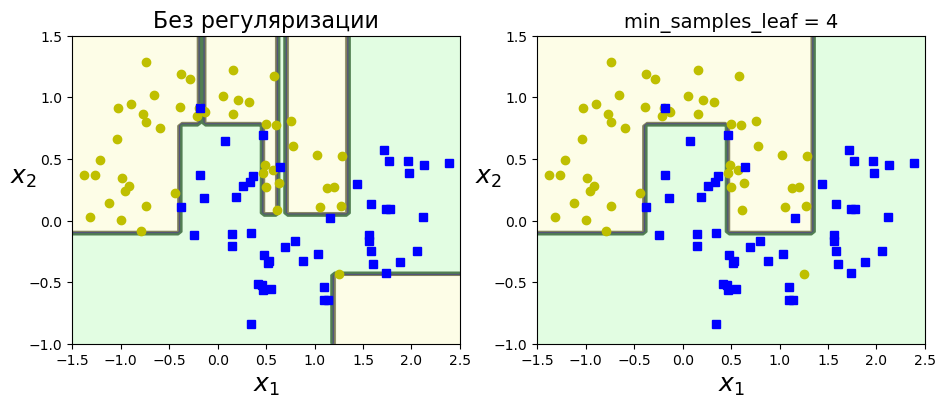

In [9]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("Без регуляризации", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

## Регрессия
Деревья принятия решений также способны иметь дело с задачами регрессии. Давайте построим дерево регрессии с применением класса DecisionTreeRegressor, обучив его на зашумлённом квадратичном наборе данных с max_depth=2.

In [10]:
# квадратичные данные + случайный шум
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

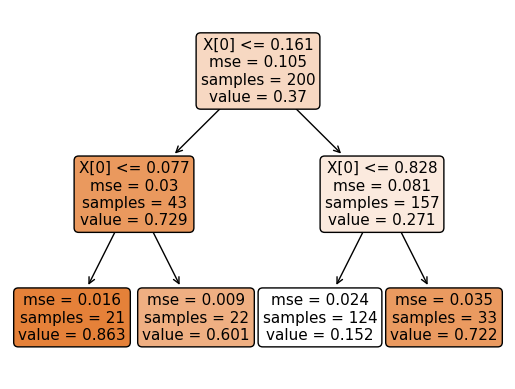

In [12]:
plot_tree(tree_reg, rounded=True, filled=True); 

Получившееся дерево выглядит очень похожим на дерево классификации, которое мы строили ранее. Главное отличие в том, что вместо прогнозирования класса в каждом узле оно прогнозирует значение. Например, пусть вы хотите выработать прогноз для нового образца с X[0] = 0.6. Вы обходите дерево, начиная с корневого узла, и в итоге добираетесь до листового узла, который прогнозирует value=0.151. Прогноз является просто средним целевым значением 146 обучающих образцов, ассоциированных с этим листовым узлом, и приводит к тому, что среднеквадратичная ошибка (MSE) на таких 110 образцах составляет 0.032. 

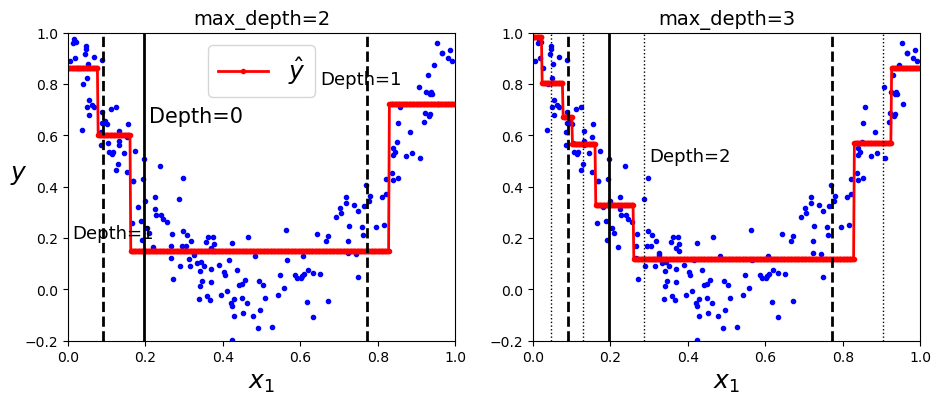

In [13]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

Прогнозы рассматриваемой модели показаны слева выше. Если вы установите max_depth=3, то получите прогнозы, представленные справа выше. Обратите внимание, что спрогнозированное значениедля каждой области всегда будет средним целевым значением образцов в этой области. Алгоритм расщепляет каждую область так, чтобы расположить большинство обучающих образцов как можно ближе к спрогнозированному значению.

Алгоритм CART работает главным образом так же, как и раньше, но только вместо попытки расщеплять обучающий набор методом, сводящим к минимуму загрязнённость, он пробует расщеплять его способом, который минимизирует MSE.
$$J(k, t_k) = \frac{m_{левый}}{m}MSE_{левый} + \frac{m_{правый}}{m}MSE_{правый}$$

Как и при задачах классификации, деревья принятия решений склонны к переобучению, когда  имеют дело с задачами регрессии. Без какой-либо реуляризации (т.е. в случае использования стандартных значений гиперпараметров) вы получите прогнозы, показанные ниже слева. Здесь очевидно крайне сильное переобучение обучающим набором. Простая установка min_samples_leaf=10 в результате даёт гораздо более рациональную модель, представленную ниже справа.

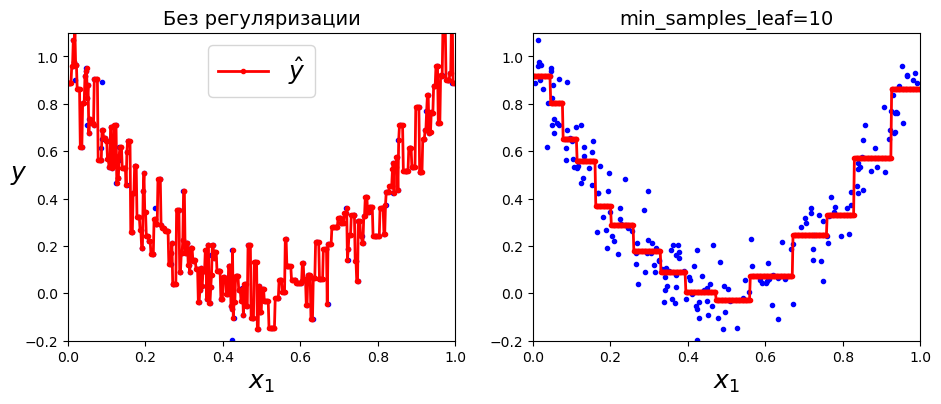

In [14]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("Без регуляризации", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}", fontsize=14)
plt.show();

## Неустойчивость
Наверняка к настоящему моменту вы уже убеждены, что деревья принятия решений обладают многими достоинствами: они простые для понимания и интерпретации, легкие в применении, универсальные и мощные. Однако с ними связано несколько ограничений.

Прежде всего, как вы могли заметить деревья принятия решений предпочитают прямоугольные границы решений (все расщепления перпендикулярны той оси или иной оси), которые делают их чувствительными к поворотам обучающего набора. Например, на рисунке ниже показан простой линейно сепарабельный набор данных: слева дерево принятия решений может его легко расщепить, тогда как справа, после поворота набора данных на 45 градусов, граница решений выглядит излишне извилистой. Хотя оба дерева принятия решений идеально подогнаны к обучающему набору, весьма вероятно, что модель справа не будет хорошо обобщаться. Один из способов ограничения такой проблемы предусматривает использование PCA (Principal Component Analysis $-$ анализ главных компонентов), который в результате даёт лучшую ориентацию данных.

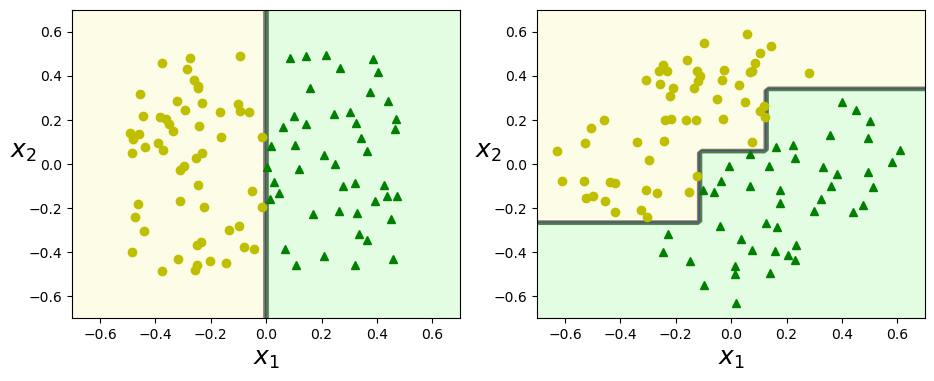

In [15]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

Обычно основной вопрос с деревьями принятия решений связан с тем, что они сильно чувствительны к небольшим изменениям в обучающих данных. Например, если вы просто удалите из обучающего набора образец самого широкого ириса разноцветного (с лепестками длиной 4.8 см и шириной 1.8 см) и обучите новое дерево, то можете получить совершенно другую модель.

В действительности, поскольку применяемый библиотекой Scikit-Learn алгоритм обучения является стохастическим (случайным), вы можете получать очень разные модели даже на тех самых обучающих наборах данных (если только не установлен гиперпараметр random_seed).

Как вы скоро увидите, случайные леса могут ограничить эту неустойчивость путем усреднения прогнозов по многим деревьям.

## Упражнения
1. Задача кредитного скоринга - одна из наиболее популярных областей, где применяются алгоритмы машинного обучения. В этом упражнении нужно будет с помощью дерева принятия решений прогнозировать, что человек просрочит выплаты по кредиту на 3 месяца и более (целевой признак - Delinquent90).

2. В продолжение предыдущего упраженения (и в качестве мостика к следующей теме) создайте лес в соответствии с перечисленными ниже шагами.
<ol>
    <li>На том же наборе данных сгенерируйте 1 000 поднаборов обучающего набора, каждый из которых содержит 100 случайно выбранных образцов. Подсказка: для этого можете использовать класс ShffleSplit из Scikit-Learn.</li>
    <li>Обучите по одному дереву принятия решений на каждом поднаборе с применением наилучших значений гиперпараметров, найденных в предыдущем упражнении. Оцените полученные 1 000 деревьев принятия решений на испытательном наборе. Поскольку эти деревья принятия решений обучались на наборах меньшего размера, то они, скорее всего, будут выполняться хуже, чем ваше дерево из первого упражнения.</li>
    <li>Наступило время магии. Для каждого образца в испытательном наборе сгенерируйте прогнозы посредством 1 000 деревьев принятия решений и сохраните только наиболее частый прогноз (для этого может воспользоваться функцией mode() из SciPy). Такой подход даёт вам <i>мажоритарные прогнозы</i> на испытательном наборе.</li>
    <li>Оцените эти прогнозы на испытательном наборе: вы должны получить чуть большую правильность, чем у первой модели (выше примерно на 0.5-1.5%). Примите поздравления, ведь вы обучили классификатор на основе случайного леса!</li>
</ol>